In [1]:
# prompt: tensorflow, numpy matplotlib pip

!pip install tensorflow numpy matplotlib


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4985 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3746 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3349 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3121 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2939 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2807 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2682 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2587 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2477 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

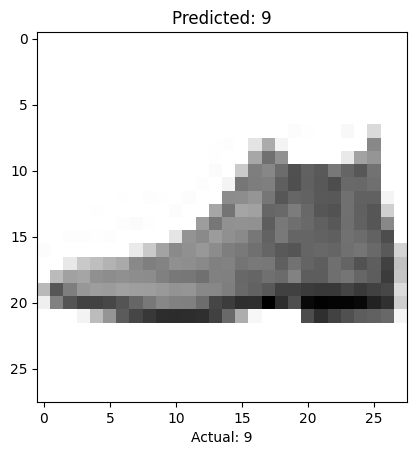

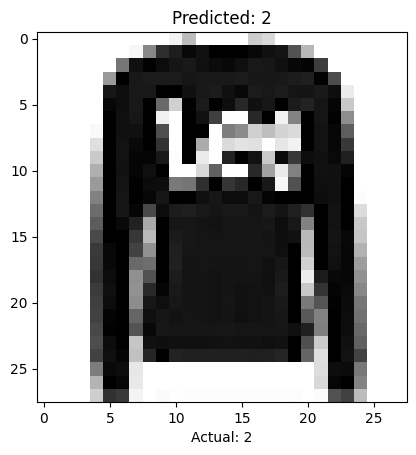

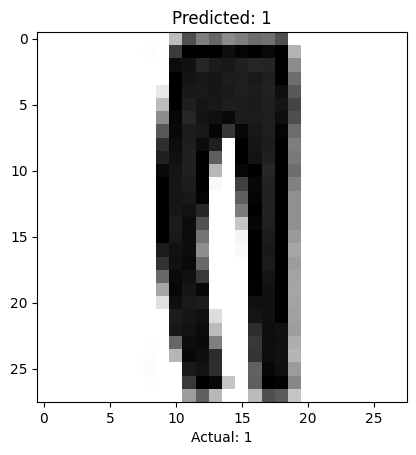

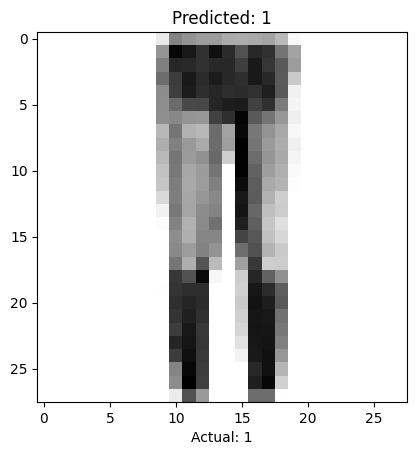

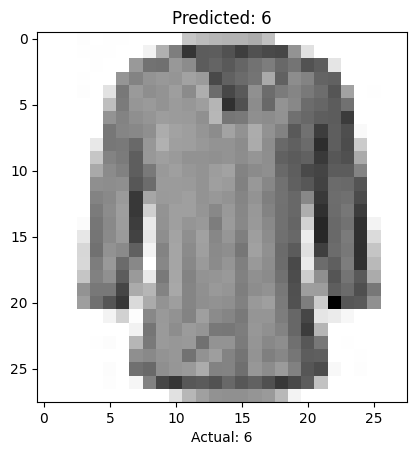

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# example with Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

num_images_to_show = 5
for i in range(num_images_to_show):
    plt.figure()
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {test_labels[i]}")
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.show()


In [8]:
# We should use a small dataset since large datasets consume too much time and aren't efficient given our limited space.

In [10]:
# This code gets the TF Flowers dataset ready, then teaches a pre-made MobileNetV2 model to recognize flower images.
# After training, it shows how well the model learned by plotting graphs of its accuracy during training.

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
92/92 [==============================] - 197s 2s/step - loss: 0.7335 - accuracy: 0.7251 - val_loss: 0.5250 - val_accuracy: 0.8030
Epoch 2/5
92/92 [==============================] - 187s 2s/step - loss: 0.3792 - accuracy: 0.8741 - val_loss: 0.4231 - val_accuracy: 0.8523
Epoch 3/5
92/92 [==============================] - 182s 2s/step - loss: 0.2997 - accuracy: 0.9040 - val_loss: 0.4142 - val_accuracy: 0.8454
Epoch 4/5
92/92 [==============================] - 187s 2s/step - loss: 0.2522 - accuracy: 0.9238 - val_loss: 0.3737 - val_accuracy: 0.8728
Epoch 5/5
92/92 [==============================] - 190s 2s/step - loss: 0.2165 - accuracy: 0.9367 - val_loss: 0.3703 - val_accuracy: 0.8728


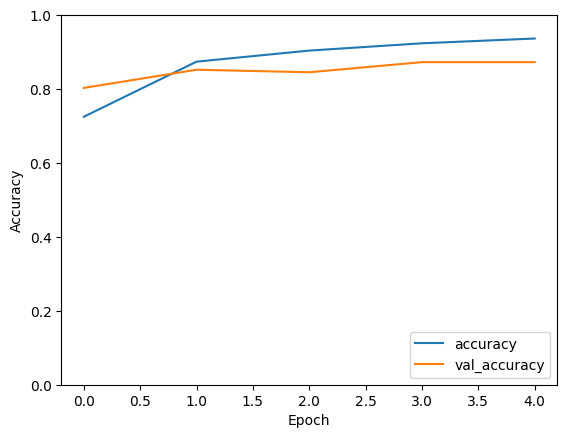

In [9]:
# just a little big data set here

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# TF Flowers
data = keras.utils.get_file('flower_photos',
                            'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                            untar=True)

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                       validation_split=0.2)

train_generator = datagen.flow_from_directory(data,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='sparse',
                                              subset='training')

validation_generator = datagen.flow_from_directory(data,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='sparse',
                                                   subset='validation')

model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(5)

model = tf.keras.Sequential([
    model,
    global_average_layer,
    prediction_layer
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()